# Variabilidad genética del gen <i>CRB1</i> en población general

Importar librerías

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Importar datos

In [3]:
#GnomAD
gnomad_crb1 = pd.read_json("data/Gnomad_crb1.json", lines = True)
gnomad_crb1.head()

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,TYPE,CANONICAL,...,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON
0,1,197241517,197241518,[rs1335507706],G,C,1,0.000032,snv,YES,...,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN
1,1,197239998,197239999,[rs1318432555],C,T,1,0.000032,snv,YES,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN
2,1,197240222,197240225,[rs1383439447],GGA,G,1,0.000032,del,YES,...,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN
3,1,197239286,197239287,[rs945705379],A,G,5,0.000159,snv,YES,...,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN
4,1,197241224,197241225,[rs1322562610],G,T,1,0.000032,snv,YES,...,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN


In [4]:
#ClinVar
clinvar_crb1 = pd.read_csv("data/raw/clinvar_result.txt", sep='\t')
clinvar_crb1.head()

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,197268218,294666,278311,rs886045782,NC_000001.11:197268217:G:A,NaN
2,NM_201253.3(CRB1):c.-56C>G,CRB1,NaN,Retinitis pigmentosa|Leber congenital amaurosi...,"Uncertain significance(Last reviewed: Apr 27, ...","criteria provided, single submitter",VCV000874265,1.0,197237487,1.0,197268357,874265,863217,rs1654712316,NC_000001.11:197268356:C:G,NaN
3,NM_201253.3(CRB1):c.-55C>T,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000875194,1.0,197237488,1.0,197268358,875194,863218,rs965921500,NC_000001.11:197268357:C:T,NaN
4,NM_201253.3(CRB1):c.4G>A (p.Ala2Thr),CRB1,A2T,Leber congenital amaurosis 8|Retinitis pigment...,"Uncertain significance(Last reviewed: Jun 13, ...","criteria provided, single submitter",VCV001479173,1.0,197237546,1.0,197268416,1479173,1426544,NaN,NC_000001.11:197268415:G:A,NaN


In [5]:
#Transcript information
table = pd.read_html('https://databases.lovd.nl/shared/refseq/CRB1_NM_201253.2_table.html')
crb1_transcript = table[0]
crb1_transcript.head()

,exon,c.startExon,c.endExon,g.startExon,g.endExon,lengthExon,lengthIntron
0,1,-209,70,4927,5205,279,59939.0
1,2,71,652,65145,65726,582,15277.0
2,3,653,848,81004,81199,196,2863.0
3,4,849,988,84063,84202,140,9351.0
4,5,989,1171,93554,93736,183,63986.0


# Limpieza y estructura de datos

In [6]:
gnomad_crb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHROM        20355 non-null  int64  
 1   START_POS    20355 non-null  int64  
 2   END_POS      20355 non-null  int64  
 3   dbSNP        20355 non-null  object 
 4   REF          20355 non-null  object 
 5   ALT          20355 non-null  object 
 6   AC           20355 non-null  int64  
 7   AF           20355 non-null  float64
 8   TYPE         20355 non-null  object 
 9   CANONICAL    20355 non-null  object 
 10  Consequence  20355 non-null  object 
 11  Symbol       20355 non-null  object 
 12  INTRON       18216 non-null  object 
 13  HGVSc        18610 non-null  object 
 14  popmax       18987 non-null  object 
 15  AF_popmax    18987 non-null  float64
 16  AF_nfe       20355 non-null  float64
 17  AF_fin       20350 non-null  float64
 18  AF_est       20353 non-null  float64
 19  AF_n

In [7]:
clinvar_crb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   1448 non-null   object 
 1   Gene(s)                                1448 non-null   object 
 2   Protein change                         806 non-null    object 
 3   Condition(s)                           1448 non-null   object 
 4   Clinical significance (Last reviewed)  1448 non-null   object 
 5   Review status                          1448 non-null   object 
 6   Accession                              1448 non-null   object 
 7   GRCh37Chromosome                       1446 non-null   float64
 8   GRCh37Location                         1446 non-null   object 
 9   GRCh38Chromosome                       1439 non-null   float64
 10  GRCh38Location                         1439 non-null   object 
 11  Vari

In [8]:
gnomad_crb1 = gnomad_crb1.explode('dbSNP')
gnomad_crb1[['Transcript ID', 'HGVSc']] = gnomad_crb1['HGVSc'].str.split(':', n=1, expand=True)
gnomad_crb1.head()

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,TYPE,CANONICAL,...,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID
0,1,197241517,197241518,rs1335507706,G,C,1,0.000032,snv,YES,...,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
1,1,197239998,197239999,rs1318432555,C,T,1,0.000032,snv,YES,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
2,1,197240222,197240225,rs1383439447,GGA,G,1,0.000032,del,YES,...,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
3,1,197239286,197239287,rs945705379,A,G,5,0.000159,snv,YES,...,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN,ENST00000367400.3
4,1,197241224,197241225,rs1322562610,G,T,1,0.000032,snv,YES,...,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN,ENST00000367400.3


In [9]:
clinvar_crb1[['RefSeq', 'HGVSc']] = clinvar_crb1['Name'].str.split(':', n=1, expand=True)
clinvar_crb1[['HGVSc', 'HGVSp']] = clinvar_crb1['HGVSc'].str.split(pat=' ', n=1, expand=True)
clinvar_crb1[['REF', 'ALT']] = clinvar_crb1['HGVSc'].str.split('>', n=1, expand=True)
clinvar_crb1[['START_POS', 'END_POS']] = clinvar_crb1['GRCh37Location'].str.split(pat=' - ', n=1, expand=True)
clinvar_crb1.loc[clinvar_crb1['END_POS'].isnull(), 'END_POS'] = clinvar_crb1['START_POS']
clinvar_crb1[['ClinSign', 'ClinReview']] = clinvar_crb1['Clinical significance (Last reviewed)'].str.split('(', n=1, expand=True)
clinvar_crb1.head(n=2)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,...,Unnamed: 15,RefSeq,HGVSc,HGVSp,REF,ALT,START_POS,END_POS,ClinSign,ClinReview
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,...,NaN,NM_201253.2(CRB1),c.-204C>T,None,c.-204C,T,197237339,197237339,Uncertain significance,"Last reviewed: Jan 13, 2018)"
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,...,NaN,NM_201253.2(CRB1),c.-195G>A,None,c.-195G,A,197237348,197237348,Uncertain significance,"Last reviewed: Jan 13, 2018)"


In [10]:
clinvar_crb1 = clinvar_crb1[clinvar_crb1["Gene(s)"] == "CRB1"]
clinvar_crb1['RefSeq'].unique()

array(['NM_201253.2(CRB1)', 'NM_201253.3(CRB1)', 'NC_000001.10',
       'Single allele', 'CRB1, ALU INS, NT2320'], dtype=object)

In [11]:
clinvar_crb1['RefSeq'] = clinvar_crb1['RefSeq'].replace('NM_201253.2(CRB1)', 'NM_201253')
clinvar_crb1['RefSeq'] = clinvar_crb1['RefSeq'].replace('NM_201253.3(CRB1)', 'NM_201253')
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['RefSeq'] == 'NM_201253']
clinvar_crb1.head()

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,...,Unnamed: 15,RefSeq,HGVSc,HGVSp,REF,ALT,START_POS,END_POS,ClinSign,ClinReview
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,...,NaN,NM_201253,c.-204C>T,None,c.-204C,T,197237339,197237339,Uncertain significance,"Last reviewed: Jan 13, 2018)"
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,...,NaN,NM_201253,c.-195G>A,None,c.-195G,A,197237348,197237348,Uncertain significance,"Last reviewed: Jan 13, 2018)"
2,NM_201253.3(CRB1):c.-56C>G,CRB1,NaN,Retinitis pigmentosa|Leber congenital amaurosi...,"Uncertain significance(Last reviewed: Apr 27, ...","criteria provided, single submitter",VCV000874265,1.0,197237487,1.0,...,NaN,NM_201253,c.-56C>G,None,c.-56C,G,197237487,197237487,Uncertain significance,"Last reviewed: Apr 27, 2017)"
3,NM_201253.3(CRB1):c.-55C>T,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000875194,1.0,197237488,1.0,...,NaN,NM_201253,c.-55C>T,None,c.-55C,T,197237488,197237488,Uncertain significance,"Last reviewed: Jan 13, 2018)"
4,NM_201253.3(CRB1):c.4G>A (p.Ala2Thr),CRB1,A2T,Leber congenital amaurosis 8|Retinitis pigment...,"Uncertain significance(Last reviewed: Jun 13, ...","criteria provided, single submitter",VCV001479173,1.0,197237546,1.0,...,NaN,NM_201253,c.4G>A,(p.Ala2Thr),c.4G,A,197237546,197237546,Uncertain significance,"Last reviewed: Jun 13, 2022)"


In [12]:
ref_value = lambda x: x[-1]
clinvar_crb1['REF'] = clinvar_crb1['REF'].apply(ref_value)
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['REF'] != '=']
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['REF'] != 'p']
clinvar_crb1['REF'].unique()

array(['C', 'G', 'T', 'A'], dtype=object)

In [13]:
clinvar_crb1 = clinvar_crb1.drop(['GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'Canonical SPDI', 'Clinical significance (Last reviewed)', 'Unnamed: 15'], axis=1)

Dataframe merge

In [14]:
merged = pd.merge(gnomad_crb1, clinvar_crb1,
                  how='outer', on="HGVSc")
merged.head()

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,...,GRCh37Location,dbSNP ID,RefSeq,HGVSp,REF_y,ALT_y,START_POS_y,END_POS_y,ClinSign,ClinReview
0,1.0,197241517.0,197241518.0,rs1335507706,G,C,1.0,0.000032,snv,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,197239998.0,197239999.0,rs1318432555,C,T,1.0,0.000032,snv,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,197240222.0,197240225.0,rs1383439447,GGA,G,1.0,0.000032,del,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,197239286.0,197239287.0,rs945705379,A,G,5.0,0.000159,snv,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,197241224.0,197241225.0,rs1322562610,G,T,1.0,0.000032,snv,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             20355 non-null  float64
 1   START_POS_x       20355 non-null  float64
 2   END_POS_x         20355 non-null  float64
 3   dbSNP             20045 non-null  object 
 4   REF_x             20355 non-null  object 
 5   ALT_x             20355 non-null  object 
 6   AC                20355 non-null  float64
 7   AF                20355 non-null  float64
 8   TYPE              20355 non-null  object 
 9   CANONICAL         20355 non-null  object 
 10  Consequence       20355 non-null  object 
 11  Symbol            20355 non-null  object 
 12  INTRON            18216 non-null  object 
 13  HGVSc             19783 non-null  object 
 14  popmax            18987 non-null  object 
 15  AF_popmax         18987 non-null  float64
 16  AF_nfe            20355 non-null  float6

In [16]:
merged['CHROM'] = merged['CHROM'].fillna(1)
merged.filter(regex='^AF_', axis=1).fillna(0, inplace=True)
merged['Symbol'] = merged['Symbol'].fillna("CRB1")
merged['popmax'] = merged['popmax'].fillna("affected")
merged['RefSeq'] = merged['RefSeq'].fillna(method='bfill')
merged['Transcript ID'] = merged['Transcript ID'].fillna(method='ffill')
merged.loc[merged['START_POS_x'].isnull(), 'START_POS_x'] = merged['START_POS_y']
merged.loc[merged['END_POS_x'].isnull(), 'END_POS_x'] = merged['END_POS_y']
merged.loc[merged['dbSNP'].isnull(), 'dbSNP'] = merged['dbSNP ID']
merged.loc[merged['REF_x'].isnull(), 'REF_x'] = merged['REF_y']
merged.loc[merged['ALT_x'].isnull(), 'ALT_x'] = merged['ALT_y']
merged.loc[merged['AF'] > 0.01, 'ClinSign'] = merged.loc[merged['AF'] > 0.01, 'ClinSign'].fillna("Benign")
merged['ClinSign'] = merged['ClinSign'].fillna("Uncertain significance")
# Selecciona las columnas que empiezan por 'AF'
cols = merged.columns[merged.columns.str.startswith('AF')]

# Sustituye los valores NaN de las columnas seleccionadas por 0
merged[cols] = merged[cols].fillna(0)

C:\Users\crist\AppData\Local\Temp\ipykernel_20132\3709311397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.filter(regex='^AF_', axis=1).fillna(0, inplace=True)


In [17]:
crb1_variants = merged.drop(['START_POS_y', 'END_POS_y', 'dbSNP ID', 'GRCh37Chromosome', 'GRCh37Location', 'REF_y', 'ALT_y'], axis=1)
crb1_variants['START_POS_x'] = crb1_variants['START_POS_x'].astype(int)
crb1_variants['END_POS_x'] = crb1_variants['END_POS_x'].astype(int)
crb1_variants['No_alleles'] = crb1_variants['START_POS_x'].map(crb1_variants['START_POS_x'].value_counts())
crb1_variants.tail(n=2)

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,...,Gene(s),Protein change,Condition(s),Review status,Accession,RefSeq,HGVSp,ClinSign,ClinReview,No_alleles
21526,1.0,197447180,197447180,rs1036503792,C,G,NaN,0.0,NaN,NaN,...,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"criteria provided, single submitter",VCV000873629,NM_201253,None,Uncertain significance,"Last reviewed: Jan 12, 2018)",1
21527,1.0,197447298,197447298,rs780654592,A,G,NaN,0.0,NaN,NaN,...,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"criteria provided, single submitter",VCV000874626,NM_201253,None,Uncertain significance,"Last reviewed: Mar 2, 2018)",1


In [18]:
crb1_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CHROM           21528 non-null  float64
 1   START_POS_x     21528 non-null  int32  
 2   END_POS_x       21528 non-null  int32  
 3   dbSNP           20436 non-null  object 
 4   REF_x           21528 non-null  object 
 5   ALT_x           21513 non-null  object 
 6   AC              20355 non-null  float64
 7   AF              21528 non-null  float64
 8   TYPE            20355 non-null  object 
 9   CANONICAL       20355 non-null  object 
 10  Consequence     20355 non-null  object 
 11  Symbol          21528 non-null  object 
 12  INTRON          18216 non-null  object 
 13  HGVSc           19783 non-null  object 
 14  popmax          21528 non-null  object 
 15  AF_popmax       21528 non-null  float64
 16  AF_nfe          21528 non-null  float64
 17  AF_fin          21528 non-null 

Column subgroups

In [19]:
populations = ['AF_nfe', 'AF_fin', 'AF_est', 'AF_nwe', 'AF_seu', 'AF_onf', 'AF_amr', 'AF_afr', 'AF_eas', 'AF_asj', 'AF_oth']
gender = ['AF_male', "AF_female"]
var_columns = ['START_POS_x', 'HGVSc', 'TYPE', 'No_alleles']
conseq_columns = ['Consequence', 'ClinSign', 'popmax']

In [20]:
crb1_df = crb1_variants[var_columns + conseq_columns + populations + gender]
crb1_df = crb1_df[crb1_df["Consequence"] != "intron_variant"]
crb1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 208 to 21527
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_POS_x  4032 non-null   int32  
 1   HGVSc        2287 non-null   object 
 2   TYPE         2859 non-null   object 
 3   No_alleles   4032 non-null   int64  
 4   Consequence  2859 non-null   object 
 5   ClinSign     4032 non-null   object 
 6   popmax       4032 non-null   object 
 7   AF_nfe       4032 non-null   float64
 8   AF_fin       4032 non-null   float64
 9   AF_est       4032 non-null   float64
 10  AF_nwe       4032 non-null   float64
 11  AF_seu       4032 non-null   float64
 12  AF_onf       4032 non-null   float64
 13  AF_amr       4032 non-null   float64
 14  AF_afr       4032 non-null   float64
 15  AF_eas       4032 non-null   float64
 16  AF_asj       4032 non-null   float64
 17  AF_oth       4032 non-null   float64
 18  AF_male      4032 non-null   float64
 19  AF_femal

In [21]:
crb1_df.dropna(inplace=True)
# Obtener la posición concreta de la variante con respecto al cDNA
crb1_df['cDNA_Position'] = crb1_df['HGVSc'].str.extract(r'(-?\d+)')
crb1_df['cDNA_Position'] = crb1_df['cDNA_Position'].astype(int)
crb1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 1953 to 20257
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_POS_x    1114 non-null   int32  
 1   HGVSc          1114 non-null   object 
 2   TYPE           1114 non-null   object 
 3   No_alleles     1114 non-null   int64  
 4   Consequence    1114 non-null   object 
 5   ClinSign       1114 non-null   object 
 6   popmax         1114 non-null   object 
 7   AF_nfe         1114 non-null   float64
 8   AF_fin         1114 non-null   float64
 9   AF_est         1114 non-null   float64
 10  AF_nwe         1114 non-null   float64
 11  AF_seu         1114 non-null   float64
 12  AF_onf         1114 non-null   float64
 13  AF_amr         1114 non-null   float64
 14  AF_afr         1114 non-null   float64
 15  AF_eas         1114 non-null   float64
 16  AF_asj         1114 non-null   float64
 17  AF_oth         1114 non-null   float64
 18  AF_male  

Complete exon column from transcript information

In [22]:
crb1_transcript.loc[11, 'c.endExon'] = 4006+792
crb1_transcript.loc[11, 'lengthIntron']=0
crb1_transcript['c.endExon'] = crb1_transcript['c.endExon'].astype(int)
crb1_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exon          12 non-null     int64  
 1   c.startExon   12 non-null     int64  
 2   c.endExon     12 non-null     int32  
 3   g.startExon   12 non-null     int64  
 4   g.endExon     12 non-null     int64  
 5   lengthExon    12 non-null     int64  
 6   lengthIntron  12 non-null     float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 756.0 bytes


In [23]:
def find_exon(row):
    pos = int(row['cDNA_Position'])
    for idx, exon in crb1_transcript.iterrows():
        if row['Consequence']=='3_prime_UTR_variant':
            return crb1_transcript['exon'].max()
        if pos >= exon['c.startExon'] and pos <= exon['c.endExon']:
            return exon['exon']
    return None

In [24]:
crb1_df['Exon'] = crb1_df.apply(find_exon, axis=1)
crb1_df['Exon'] = crb1_df['Exon'].astype(int)
crb1_df.head()

,START_POS_x,HGVSc,TYPE,No_alleles,Consequence,ClinSign,popmax,AF_nfe,AF_fin,AF_est,...,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,cDNA_Position,Exon
1953,197237540,c.-2C>T,snv,1,5_prime_UTR_variant,Uncertain significance,amr,0.000000,0.000000,0.000000,...,0.000000,0.001182,0.000000,0.0,0.0,0.000000,0.000057,0.000000,-2,1
1956,197237503,c.-39C>T,snv,1,5_prime_UTR_variant,Uncertain significance,afr,0.000065,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.0,0.000000,0.000057,0.000072,-39,1
1957,197237545,c.4G>A,snv,1,missense_variant,Uncertain significance,nfe,0.000065,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000072,4,1
2189,197237570,c.29T>C,snv,1,missense_variant,Conflicting interpretations of pathogenicity,nfe,0.000584,0.002303,0.000873,...,0.001404,0.000000,0.000000,0.0,0.0,0.001842,0.000229,0.001078,29,1
2219,197446944,c.4157A>G,snv,2,missense_variant,Uncertain significance,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.0,0.000000,0.000000,0.000072,4157,12


Simplify variant type column

In [25]:
crb1_df.loc[crb1_df['Consequence'].str.contains('splice'), 'Consequence'] = 'splice_variant'
crb1_df.loc[crb1_df['Consequence'].str.contains('non'), 'Consequence'] = 'non_coding'
crb1_df.head(n=10)

,START_POS_x,HGVSc,TYPE,No_alleles,Consequence,ClinSign,popmax,AF_nfe,AF_fin,AF_est,...,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,cDNA_Position,Exon
1953,197237540,c.-2C>T,snv,1,5_prime_UTR_variant,Uncertain significance,amr,0.000000,0.000000,0.000000,...,0.000000,0.001182,0.000000,0.0,0.000000,0.000000,0.000057,0.000000,-2,1
1956,197237503,c.-39C>T,snv,1,5_prime_UTR_variant,Uncertain significance,afr,0.000065,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.000000,0.000000,0.000057,0.000072,-39,1
1957,197237545,c.4G>A,snv,1,missense_variant,Uncertain significance,nfe,0.000065,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000072,4,1
2189,197237570,c.29T>C,snv,1,missense_variant,Conflicting interpretations of pathogenicity,nfe,0.000584,0.002303,0.000873,...,0.001404,0.000000,0.000000,0.0,0.000000,0.001842,0.000229,0.001078,29,1
2219,197446944,c.4157A>G,snv,2,missense_variant,Uncertain significance,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.000000,0.000000,0.000000,0.000072,4157,12
2224,197447239,c.*231C>T,snv,1,3_prime_UTR_variant,Uncertain significance,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.000000,0.000000,0.000057,0.000000,231,12
2307,197447433,c.*425T>C,snv,1,3_prime_UTR_variant,Uncertain significance,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.000000,0.000000,0.000000,0.000072,425,12
2312,197447227,c.*219C>T,snv,1,3_prime_UTR_variant,Uncertain significance,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000230,0.0,0.000000,0.000000,0.000000,0.000144,219,12
2330,197447473,c.*465C>A,snv,1,3_prime_UTR_variant,Uncertain significance,affected,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.003448,0.000000,0.000057,0.000000,465,12
2350,197447411,c.*403A>C,snv,1,3_prime_UTR_variant,Uncertain significance,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000230,0.0,0.000000,0.000000,0.000057,0.000072,403,12


ACMG pathogenic score

In [26]:
crb1_df['ClinSign'] = crb1_df['ClinSign'].replace(to_replace='.*ely benign.*', value=2, regex=True)
crb1_df['ClinSign'] = crb1_df['ClinSign'].replace(to_replace='Benign', value=1, regex=True)
crb1_df['ClinSign'] = crb1_df['ClinSign'].replace(to_replace='.*ely pathogenic.*', value=4, regex=True)
crb1_df['ClinSign'] = crb1_df['ClinSign'].replace(to_replace='Pathogenic', value=5, regex=True)
crb1_df.loc[~crb1_df['ClinSign'].isin([1, 2, 4, 5]), 'ClinSign'] = 3
crb1_df['ClinSign'] = crb1_df['ClinSign'].astype(int)
crb1_df.head()

,START_POS_x,HGVSc,TYPE,No_alleles,Consequence,ClinSign,popmax,AF_nfe,AF_fin,AF_est,...,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,cDNA_Position,Exon
1953,197237540,c.-2C>T,snv,1,5_prime_UTR_variant,3,amr,0.000000,0.000000,0.000000,...,0.000000,0.001182,0.000000,0.0,0.0,0.000000,0.000057,0.000000,-2,1
1956,197237503,c.-39C>T,snv,1,5_prime_UTR_variant,3,afr,0.000065,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.0,0.000000,0.000057,0.000072,-39,1
1957,197237545,c.4G>A,snv,1,missense_variant,3,nfe,0.000065,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000072,4,1
2189,197237570,c.29T>C,snv,1,missense_variant,3,nfe,0.000584,0.002303,0.000873,...,0.001404,0.000000,0.000000,0.0,0.0,0.001842,0.000229,0.001078,29,1
2219,197446944,c.4157A>G,snv,2,missense_variant,3,afr,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000115,0.0,0.0,0.000000,0.000000,0.000072,4157,12


In [27]:
crb1_df.to_csv('data/processed/crb1_df.csv', index=False)

In [28]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

<font size = 5><b>La frecuencia y distribución de las variantes del gen <i>CRB1</i> en población general siguen un patrón de variabilidad genética que se puede asociar a enfermedad visual</b></font>

1. La variabilidad poblacional nos permite identificar posiciones críticas en <b>CRB1</b>

Partiendo del dataframe general

In [29]:
pathogenic_var = crb1_variants[crb1_variants['ClinSign'].str.contains('Pathogenic')]
lik_pathogenic_var = crb1_variants[crb1_variants['ClinSign'].str.contains('ely pathogenic')]
benign_var = crb1_variants[crb1_variants['ClinSign'].str.contains('enign')]
vus_var = crb1_variants.loc[~crb1_variants['ClinSign'].isin(pathogenic_var['ClinSign']) & 
                                      ~crb1_variants['ClinSign'].isin(lik_pathogenic_var['ClinSign']) & 
                                      ~crb1_variants['ClinSign'].isin(benign_var['ClinSign'])]

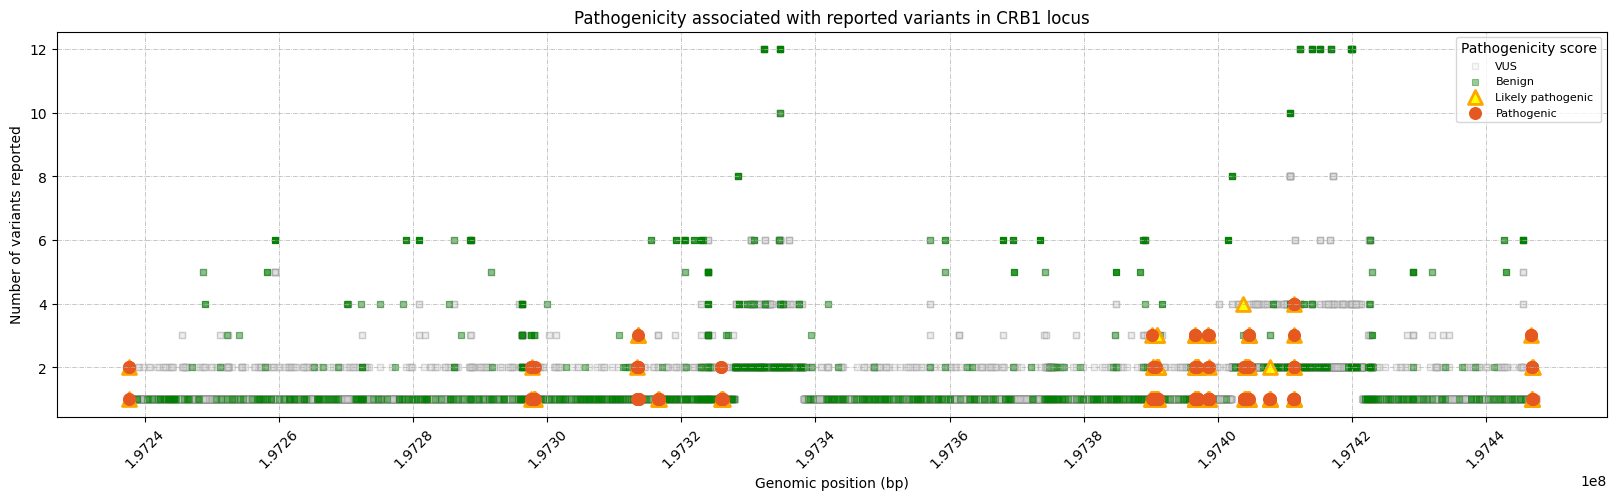

In [30]:
plt.scatter(vus_var['START_POS_x'], vus_var['No_alleles'],
            s=20, color='#DEDEDE', alpha=.2,
            marker ="s",
            edgecolor ='#999999')
plt.scatter(benign_var['START_POS_x'], benign_var['No_alleles'],
            c ="green", s = 20, alpha = 0.4,
            linewidths = 0.8,
            marker ="s",
            edgecolor ="green") 
plt.scatter(lik_pathogenic_var['START_POS_x'], lik_pathogenic_var['No_alleles'],
            c ="yellow", s = 100,
            linewidths = 2,
            marker ="^",
            edgecolor ="orange")
plt.scatter(pathogenic_var['START_POS_x'], pathogenic_var['No_alleles'],
            c = '#E55921', s = 70,
            linewidths = 1,
            marker ="o",
            edgecolor ="#E55921")
plt.xticks(rotation=45, fontsize=10)
plt.locator_params(nbins=12)
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.5)
plt.legend(['VUS', 'Benign', 'Likely pathogenic', 'Pathogenic'], title="Pathogenicity score",
           loc='upper right', fontsize=8, bbox_to_anchor=(1,1), frameon=True, fancybox=True)
plt.ylabel('Number of variants reported')
plt.xlabel('Genomic position (bp)')
plt.title('Pathogenicity associated with reported variants in CRB1 locus')
plt.gcf().set_size_inches((20, 5))

A partir de las variantes en regiones exónicas

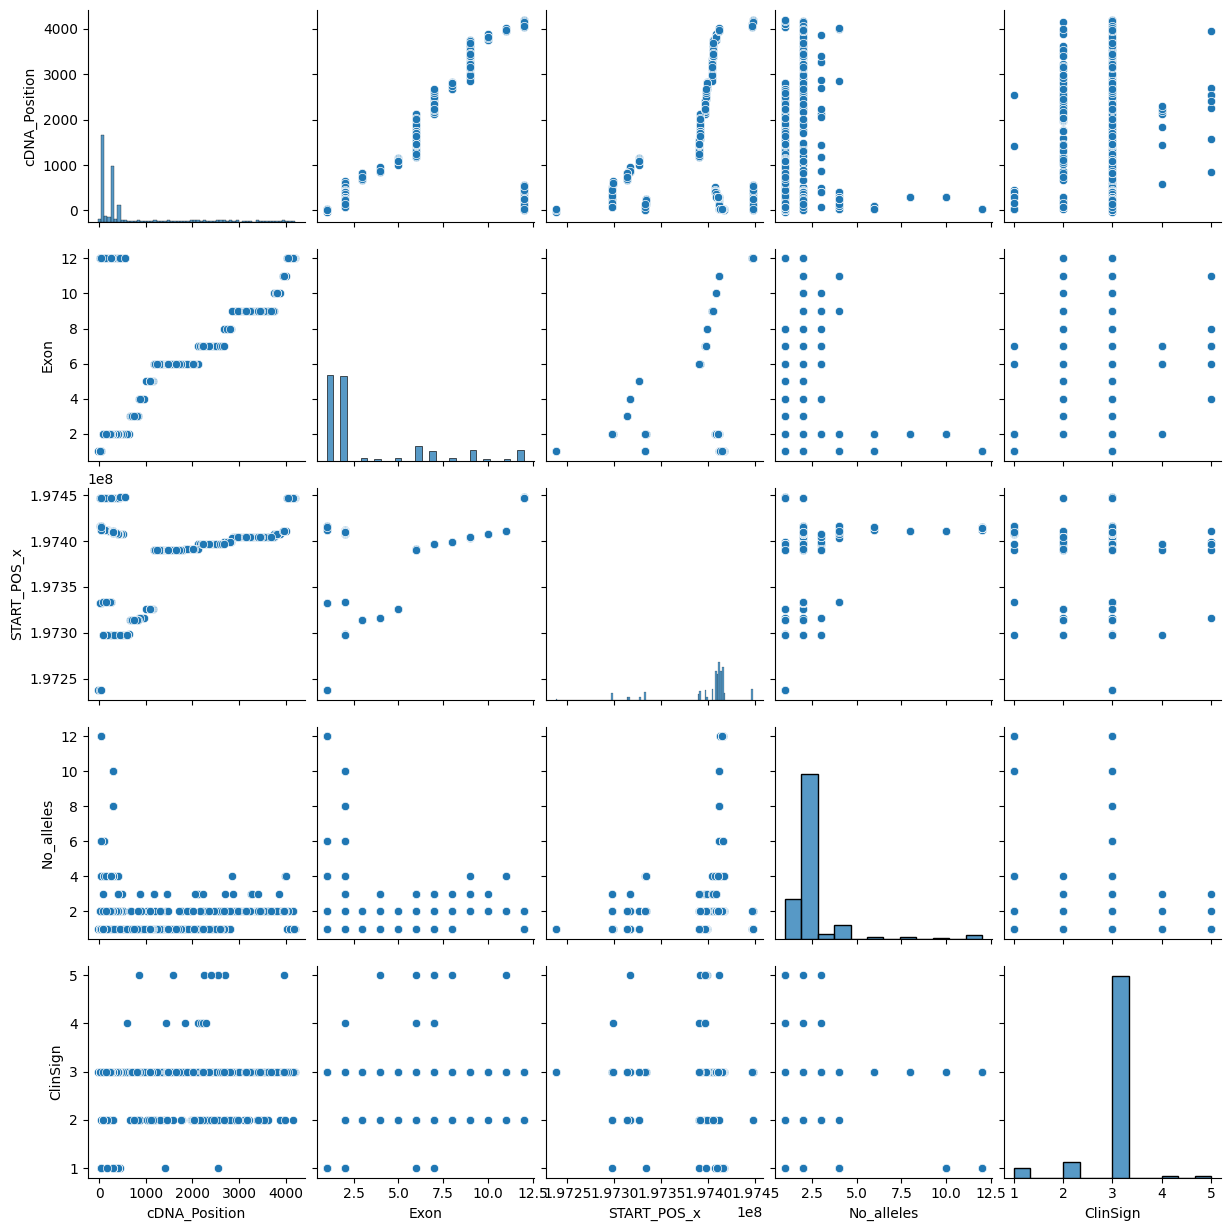

In [31]:
sns.pairplot(data=crb1_df[['cDNA_Position', 'Exon'] + var_columns + conseq_columns], )

C:\Users\crist\AppData\Local\Temp\ipykernel_20132\634523400.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=crb1_df, x="Exon", hue="Consequence", cut=0,


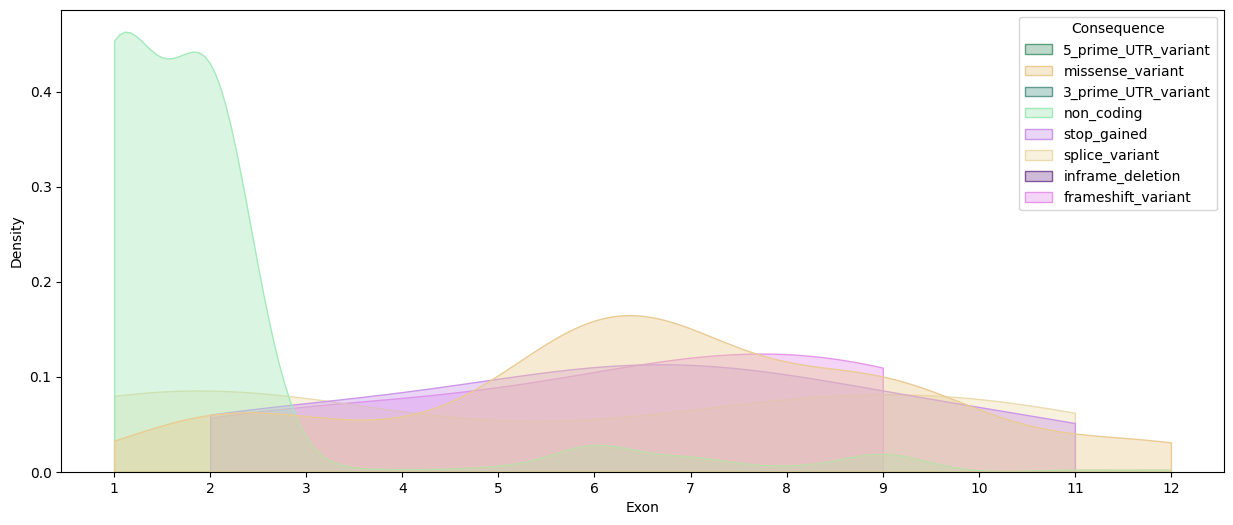

In [32]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=crb1_df, x="Exon", hue="Consequence", cut=0,
            fill=True, common_norm=False, alpha=0.4,
            palette=['#5D9E7C', '#EACB93', '#5D9E91', '#A3EABA', '#CC96EB', '#EBDCAE', '#84559E', '#E797EB'])
plt.locator_params(axis="x", nbins=24)
plt.show()

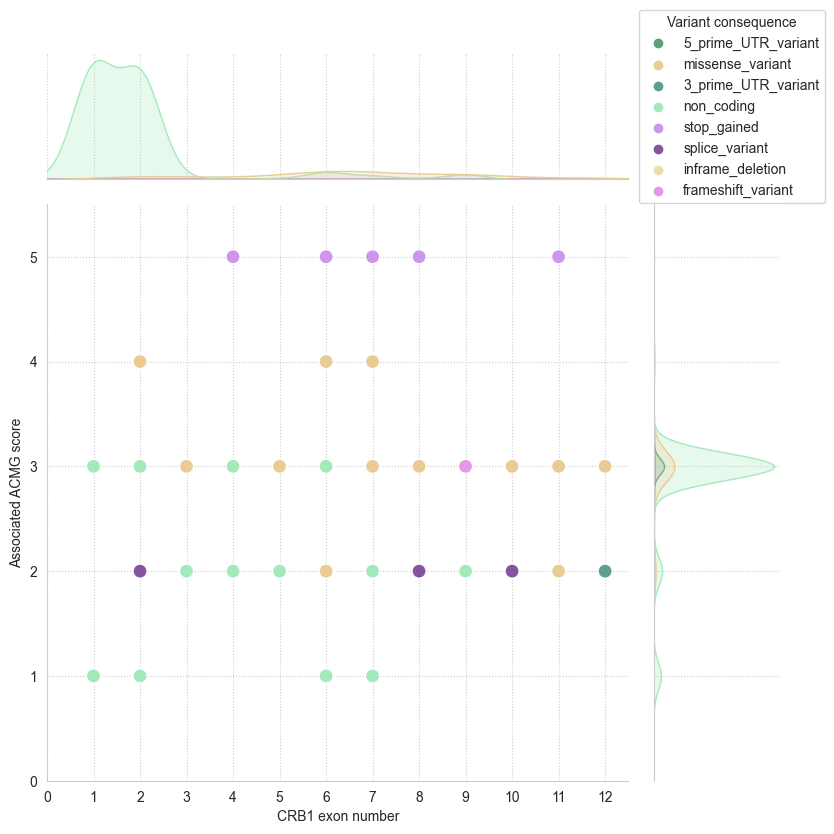

In [33]:
sns.set_style("whitegrid", {"grid.linestyle": ":"})
plot=sns.jointplot(data=crb1_df, x="Exon", y="ClinSign", hue="Consequence", height = 8,
              marker="o", s=100, ratio=4, space=.2, dropna=False, xlim=(0, 12.5), kind="scatter",
              ylim=(0, 5.5), palette=['#5D9E7C', '#EACB93', '#5D9E91', '#A3EABA', '#CC96EB', '#84559E', '#EBDCAE', '#E797EB'])
plt.ylabel('Associated ACMG score')
plt.xlabel('CRB1 exon number')
ax = plt.gca()
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.35), title="Variant consequence", frameon = True, fancybox =True, )
plt.locator_params(axis="x", nbins=24)

2. Variantes de tipo nulo son aquellas que han sido asociadas a mayor patogenicidad en este gen

In [34]:
def group_consequence(consequence):
    if consequence in ["splice_variant", 'stop_gained', 'frameshift_variant']:
        return 'null_variant'
    else:
        return 'not_null_var'

In [35]:
new_column = crb1_df['Consequence'].apply(group_consequence)
consequence_df = pd.DataFrame({
    'Consequence': new_column,
    'ClinSign': crb1_df['ClinSign'],
    'Exon': crb1_df['Exon']
})
consequence_df.head()

,Consequence,ClinSign,Exon
1953,not_null_var,3,1
1956,not_null_var,3,1
1957,not_null_var,3,1
2189,not_null_var,3,1
2219,not_null_var,3,12


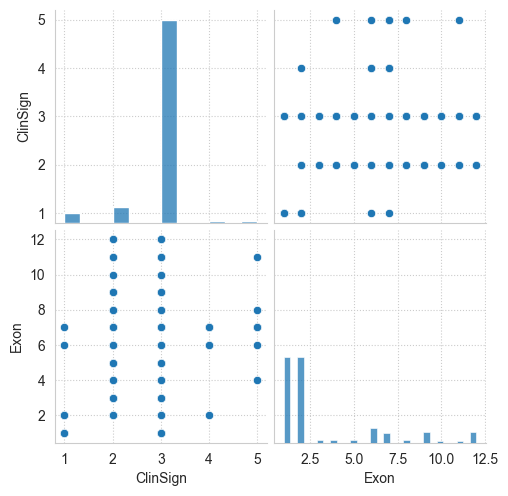

In [36]:
sns.pairplot(consequence_df)

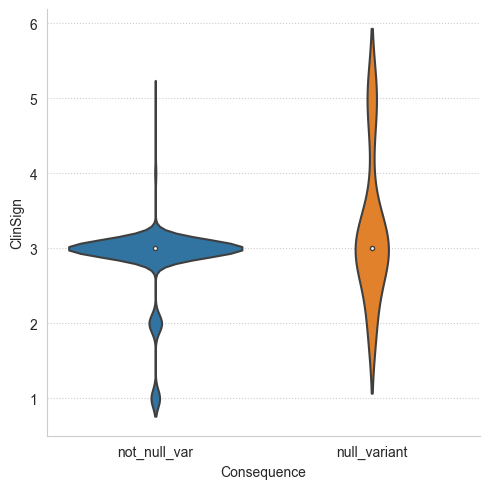

In [37]:
sns.catplot(data= consequence_df, x= "Consequence", y="ClinSign", kind="violin")

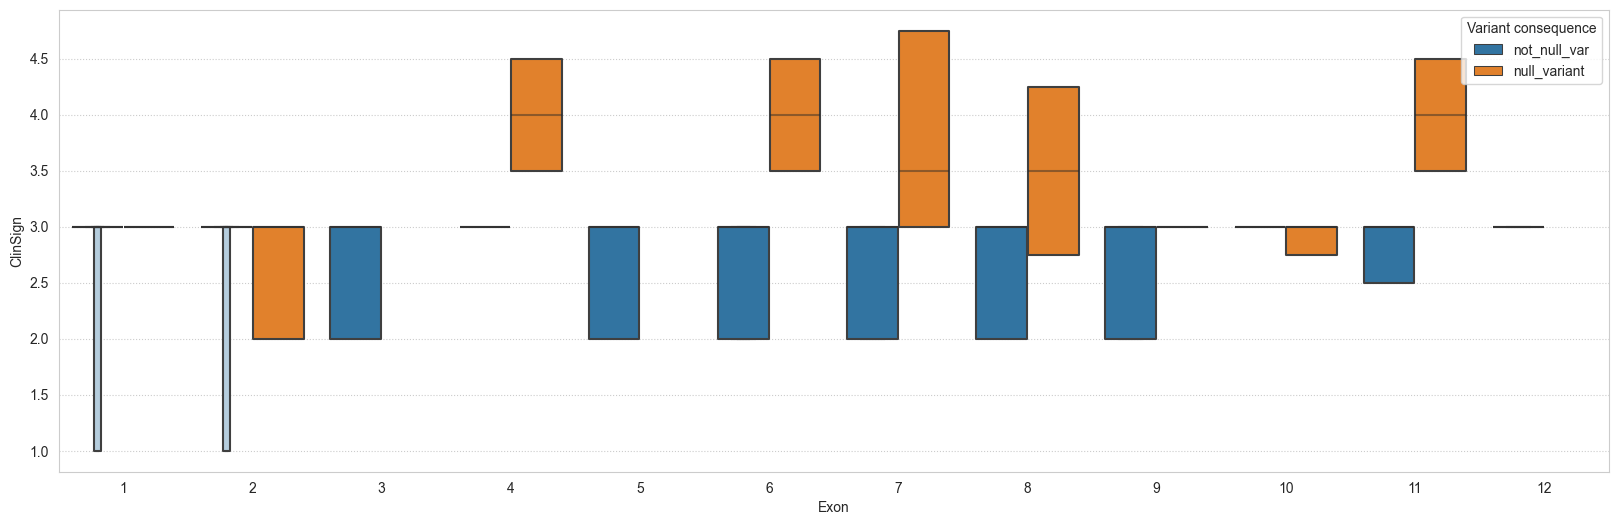

In [38]:
plt.figure(figsize=(20,6))
box_plot = sns.boxenplot(data= consequence_df, x="Exon", y="ClinSign", hue="Consequence", showfliers=False);
ax = plt.gca()
ax.legend(loc='upper right',  title="Variant consequence", frameon = True, fancybox =True, )

In [39]:
# Dividir la muestra en dos grupos según el tipo de variante
not_null_var = consequence_df[consequence_df["Consequence"] == "not_null_var"]["ClinSign"]
null_var = consequence_df[consequence_df["Consequence"] == "null_variant"]["ClinSign"]


D'Agostino-Pearson:
Statistic: 290.6967, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


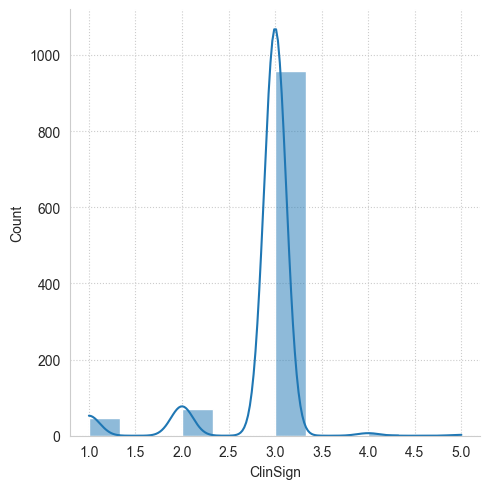

In [40]:
sns.displot(not_null_var, kde=True);
# Test de normalidad de D'Agostino-Pearson
stat, p = stats.normaltest(consequence_df['Exon'])
print("\nD'Agostino-Pearson:")
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')
hypotesis_check(p)


D'Agostino-Pearson:
Statistic: 290.6967, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


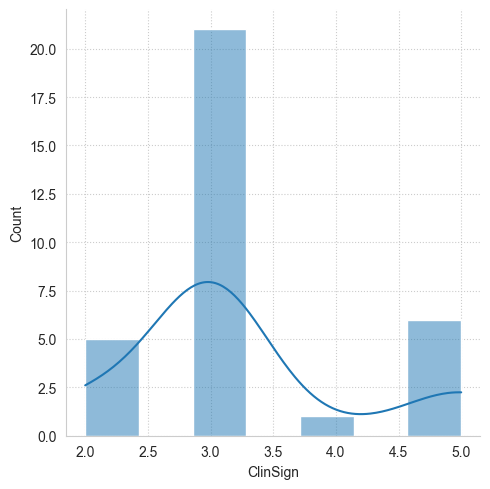

In [41]:
sns.displot(null_var, kde=True);
# Test de normalidad de D'Agostino-Pearson
stat, p = stats.normaltest(consequence_df['Exon'])
print("\nD'Agostino-Pearson:")
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')
hypotesis_check(p)

In [42]:
# Realizar la prueba de Fligner-Killeen
stat, p_value = stats.fligner(null_var, not_null_var)

print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value}")

# Selección del nivel de significación
alpha = 0.05 

# Decisión en función del p-valor y el nivel de significación

if p_value < alpha:
    print("Rechazar la hipótesis nula: heterocedástica")
else:
    print("No se puede rechazar la hipótesis nula: homocedástica")


Estadístico de prueba: 19.803203650147168
Valor p: 8.583868348606587e-06
Rechazar la hipótesis nula: heterocedástica


In [43]:
U, p_valor = stats.mannwhitneyu(null_var, not_null_var)

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))

Estadístico U:  20448.0
P-valor:  0.011620281566222818
Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: 0.0116)


3. La variabilidad es mayor en población de origen europeo que en otras poblaciones

In [44]:
populations_data = crb1_variants[['START_POS_x'] + populations]
populations_agg = populations_data.groupby('START_POS_x', as_index=False).sum()
populations_agg = populations_agg.dropna ()
populations_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17606 entries, 0 to 17605
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_POS_x  17606 non-null  int32  
 1   AF_nfe       17606 non-null  float64
 2   AF_fin       17606 non-null  float64
 3   AF_est       17606 non-null  float64
 4   AF_nwe       17606 non-null  float64
 5   AF_seu       17606 non-null  float64
 6   AF_onf       17606 non-null  float64
 7   AF_amr       17606 non-null  float64
 8   AF_afr       17606 non-null  float64
 9   AF_eas       17606 non-null  float64
 10  AF_asj       17606 non-null  float64
 11  AF_oth       17606 non-null  float64
dtypes: float64(11), int32(1)
memory usage: 1.5 MB


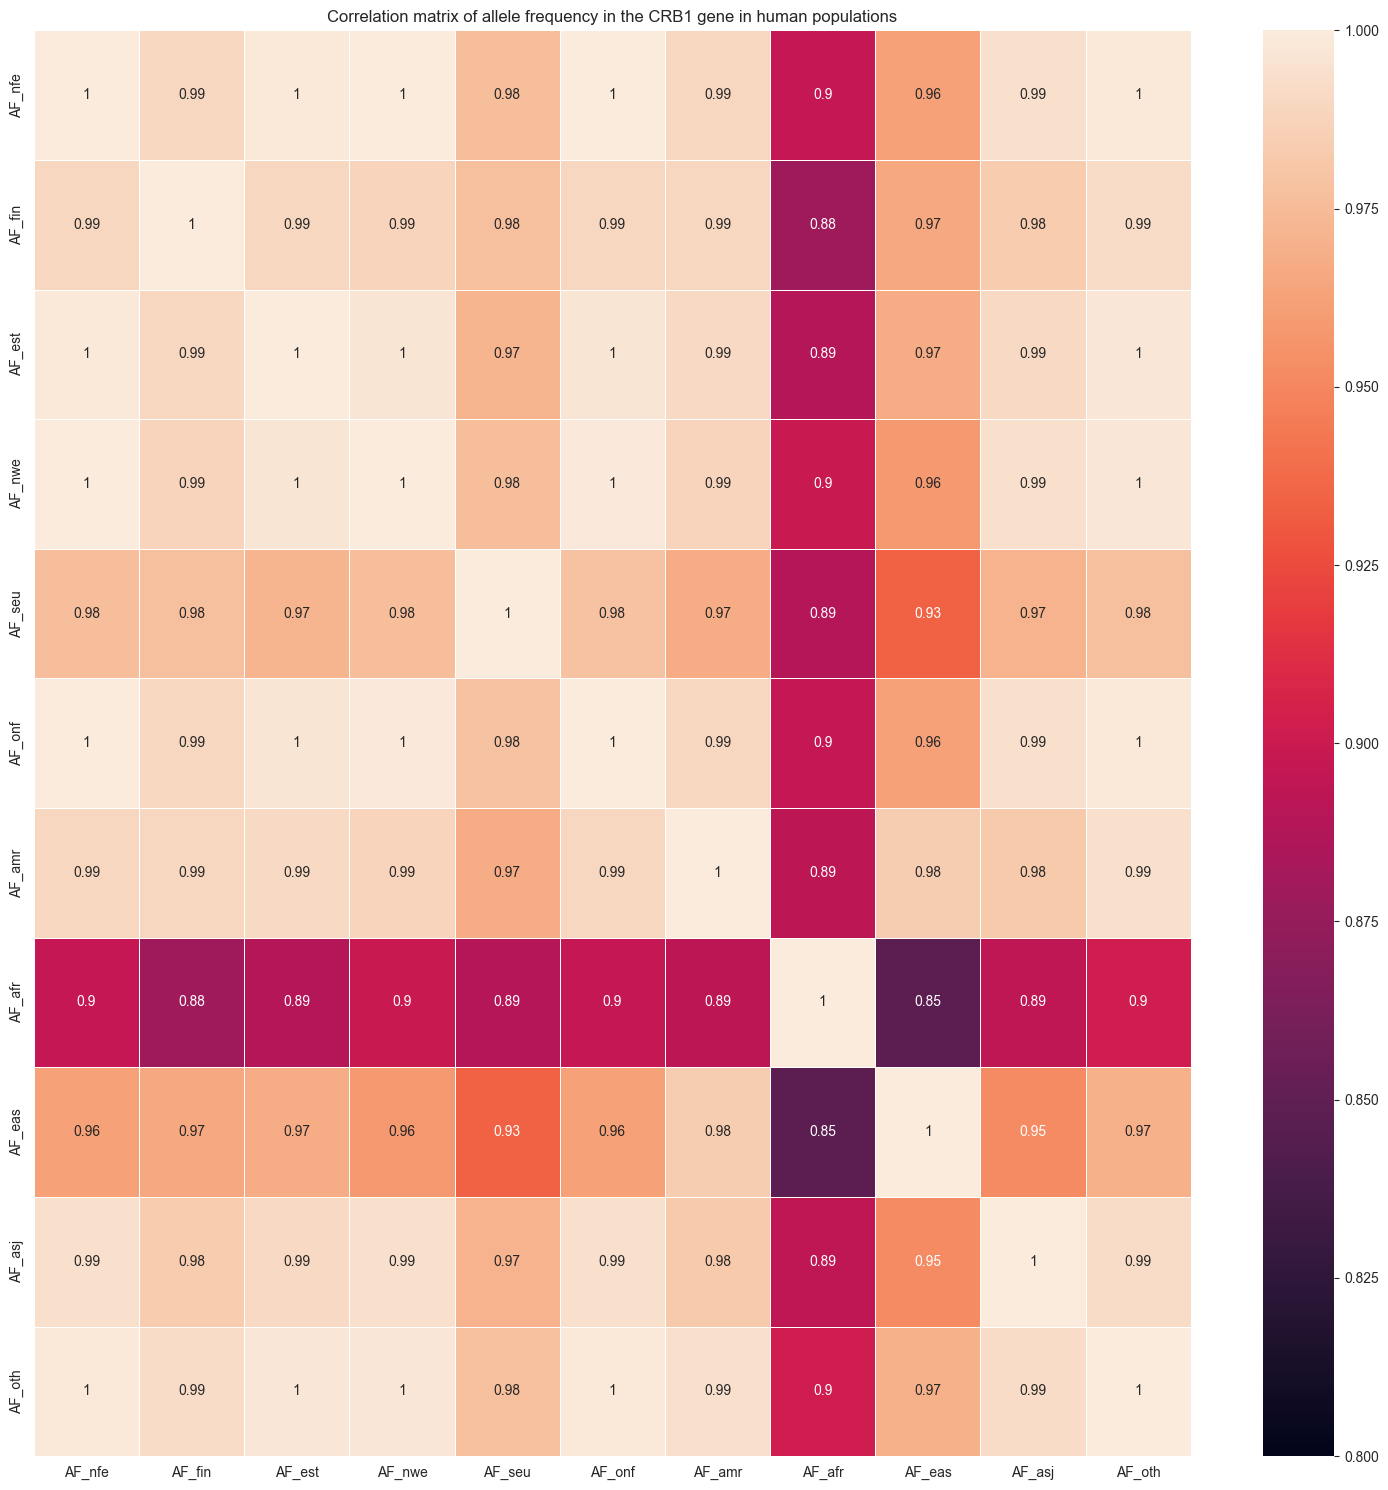

In [45]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(populations_data[populations].corr(numeric_only=True), annot=True,
            linewidths=.5, ax=ax, vmin=.8, vmax=1)
# ajustar los parámetros del gráfico
ax.set_title('Correlation matrix of allele frequency in the CRB1 gene in human populations')
plt.tight_layout()


In [46]:
populations_agg.describe()

,START_POS_x,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth
count,1.760600e+04,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000,17606.000000
mean,1.973445e+08,0.013583,0.013517,0.013615,0.013575,0.013238,0.013587,0.014083,0.013172,0.014505,0.013306,0.013774
std,5.973399e+04,0.109651,0.109667,0.110576,0.109333,0.107643,0.109596,0.112632,0.094147,0.119333,0.107960,0.110446
min,1.972373e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.972949e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.973439e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.973967e+08,0.000065,0.000000,0.000000,0.000116,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000
max,1.974476e+08,1.999612,2.000000,2.000000,1.999302,2.000000,2.000000,1.992924,1.864524,2.000000,2.000000,1.992648


In [47]:
df_melted = pd.melt(populations_agg, id_vars=['START_POS_x'], 
                    value_vars=['AF_nfe', 'AF_fin', 'AF_est', 'AF_nwe', 'AF_seu', 'AF_onf', 'AF_amr', 'AF_afr', 'AF_eas', 'AF_asj', 'AF_oth'], 
                    var_name='population', 
                    value_name='AF')
df_melted['population'] = df_melted['population'].str.replace('AF_', '')
df_melted.head()

,START_POS_x,population,AF
0,197237338,nfe,0.000000
1,197237339,nfe,0.000000
2,197237347,nfe,0.000000
3,197237348,nfe,0.000000
4,197237366,nfe,0.000259


<Axes: xlabel='population', ylabel='AF'>

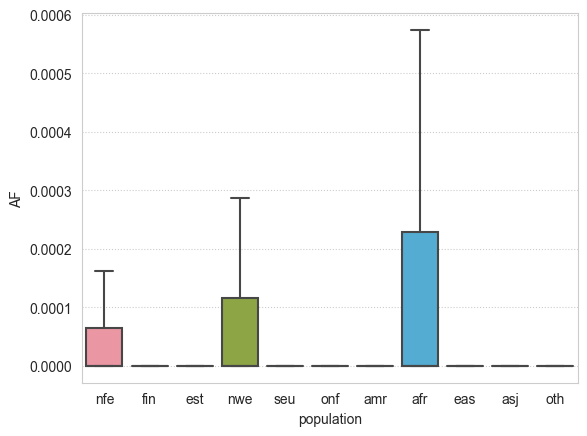

In [48]:
sns.boxplot(x="population", y="AF", data=df_melted, showfliers=False)

In [49]:
stat, p_valor = stats.kruskal(df_melted["AF"][df_melted["population"] == "nfe"], 
                        df_melted["AF"][df_melted["population"] == "fin"], 
                        df_melted["AF"][df_melted["population"] == "est"], 
                        df_melted["AF"][df_melted["population"] == "nwe"], 
                        df_melted["AF"][df_melted["population"] == "seu"],
                        df_melted["AF"][df_melted["population"] == "onf"],
                        df_melted["AF"][df_melted["population"] == "amr"],
                        df_melted["AF"][df_melted["population"] == "afr"],
                        df_melted["AF"][df_melted["population"] == "eas"],
                        df_melted["AF"][df_melted["population"] == "asj"],
                        df_melted["AF"][df_melted["population"] == "oth"],
                        )

print("Estadístico: ", stat)
print("P-valor: ", p_valor)
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de los grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de los grupos son iguales (p-value: {:.4f})".format(p_valor))

Estadístico:  19771.590244588348
P-valor:  0.0
Rechazar la hipótesis nula: las medianas de los grupos son diferentes (p-value: 0.0000)


4. No existen diferencias en la variabilidad genética entre géneros

In [50]:
gender = ['AF_male', "AF_female"]
gender_data = crb1_df[['START_POS_x'] + gender]
gender_agg = gender_data.groupby('START_POS_x', as_index=False).sum()
gender_agg = gender_agg.dropna ()
gender_agg

,START_POS_x,AF_male,AF_female
0,197237503,0.000057,0.000072
1,197237540,0.000057,0.000000
2,197237545,0.000000,0.000072
3,197237570,0.000229,0.001078
4,197297543,0.000000,0.000073
...,...,...,...
1026,197447544,0.000000,0.000215
1027,197447554,0.000114,0.000000
1028,197447561,0.000000,0.000072
1029,197447565,0.000057,0.000000


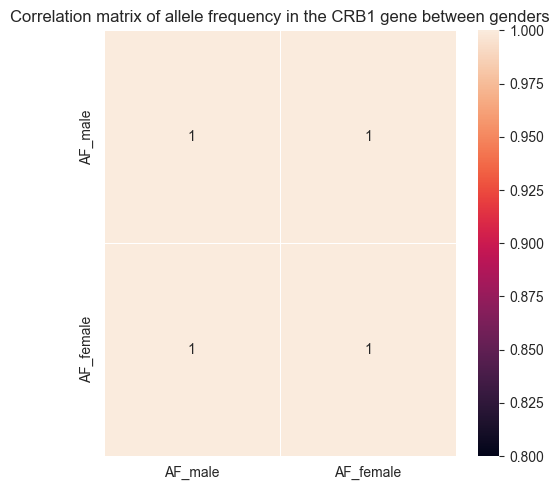

In [51]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(gender_data[gender].corr(numeric_only=True), annot=True,
            linewidths=.5, ax=ax, vmin=.8, vmax=1)

# ajustar los parámetros del gráfico
ax.set_title('Correlation matrix of allele frequency in the CRB1 gene between genders')
plt.tight_layout()

In [52]:
stats.shapiro(gender_agg['AF_male'])

ShapiroResult(statistic=0.13231760263442993, pvalue=0.0)

In [53]:
# Test de normalidad de D'Agostino-Pearson
stat, p = stats.normaltest(gender_agg['AF_male'])
print("\nD'Agostino-Pearson:")
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')


D'Agostino-Pearson:
Statistic: 1365.8471, p-value: 0.0000


In [54]:
# Test de normalidad de D'Agostino-Pearson
stat, p = stats.normaltest(gender_agg['AF_female'])
print("\nD'Agostino-Pearson:")
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')


D'Agostino-Pearson:
Statistic: 1364.7302, p-value: 0.0000


In [55]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [56]:
stats.pearsonr(gender_agg['AF_male'].dropna(), gender_agg['AF_female'].dropna())

PearsonRResult(statistic=0.9999713901987728, pvalue=0.0)

<Axes: xlabel='AF_male', ylabel='AF_female'>

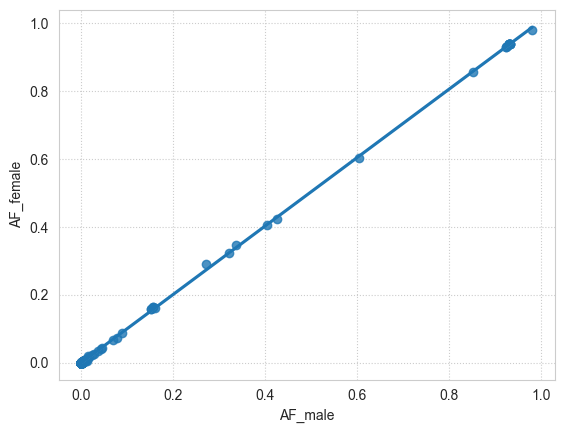

In [57]:
sns.regplot(data = gender_agg, x = 'AF_male',  y = 'AF_female')